In [1]:
import pandas as pd
import plotnine as p9

# If you want to use the raw string approach, use 'r' before the string.
midterm = pd.read_csv(r"C:\Users\ryanc\Desktop\GSB_519\national_park_trails.csv")

print(midterm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

# Question 1.1

In [2]:
ca_parks = midterm[(midterm['state_name'] == 'California')].copy()

ca_parks.head(1) #707 trails from 3313

trail_id                                        name  \
219  10026910  Vernal and Nevada Falls via the Mist Trail   

                  area_name        city_name  state_name   country_name  \
219  Yosemite National Park  Yosemite Valley  California  United States   

                                  _geoloc  popularity     length  \
219  {'lat': 37.73495, 'lng': -119.56619}     68.1488  10299.776   

     elevation_gain  difficulty_rating route_type  visitor_usage  avg_rating  \
219        667.8168                  3       loop            3.0         5.0   

     num_reviews                                           features  \
219         1869  ['dogs-no', 'forest', 'partially-paved', 'rive...   

                                           activities units  
219  ['birding', 'hiking', 'nature-trips', 'walking']     i

In [3]:
ca_parks['length_miles']=ca_parks['length'].apply(lambda x : x*0.000621371)

In [4]:
top_4_trails = ca_parks.sort_values(by='length', ascending=False).head(4)

fourth_longest_length = top_4_trails.iloc[3]['length_miles']
print(f"The length of the fourth-longest trail is: {fourth_longest_length} miles")

The length of the fourth-longest trail is: 145.199594186328 miles


# Question 1.2

In [5]:
midterm2 = ca_parks[(ca_parks['elevation_gain'] < 500) & (ca_parks['length'] < 5000) & (ca_parks['difficulty_rating'] < 4)]

midterm2answer = midterm2[["area_name", "avg_rating"]].groupby("area_name").mean()

max_row = midterm2answer.loc[midterm2answer["avg_rating"].idxmax()]

# Converting value to a string before printing
max_rating_str = str(max_row['avg_rating'])

print(f"{max_row.name} has the highest average rating of its 'easy' trails")

Kings Canyon National Park has the highest average rating of its 'easy' trails


# Question 1.3

In [6]:
midterm3 = midterm[midterm['area_name'].str.contains('land')] 

print(midterm3['area_name'].unique())
len(midterm3["area_name"].unique())

['Channel Islands National Park' 'Badlands National Park'
 'Canyonlands National Park']


3

# Question 1.4

In [7]:
midterm4 = midterm.dropna()
np_trails = midterm4.melt(value_vars=['avg_rating', 'difficulty_rating', 'popularity', 'visitor_usage'],
                                  var_name='measure',
                                  value_name='score')

np_trails

measure  score
0         avg_rating    5.0
1         avg_rating    4.5
2         avg_rating    4.5
3         avg_rating    4.5
4         avg_rating    4.5
...              ...    ...
12235  visitor_usage    2.0
12236  visitor_usage    2.0
12237  visitor_usage    2.0
12238  visitor_usage    1.0
12239  visitor_usage    2.0

[12240 rows x 2 columns]

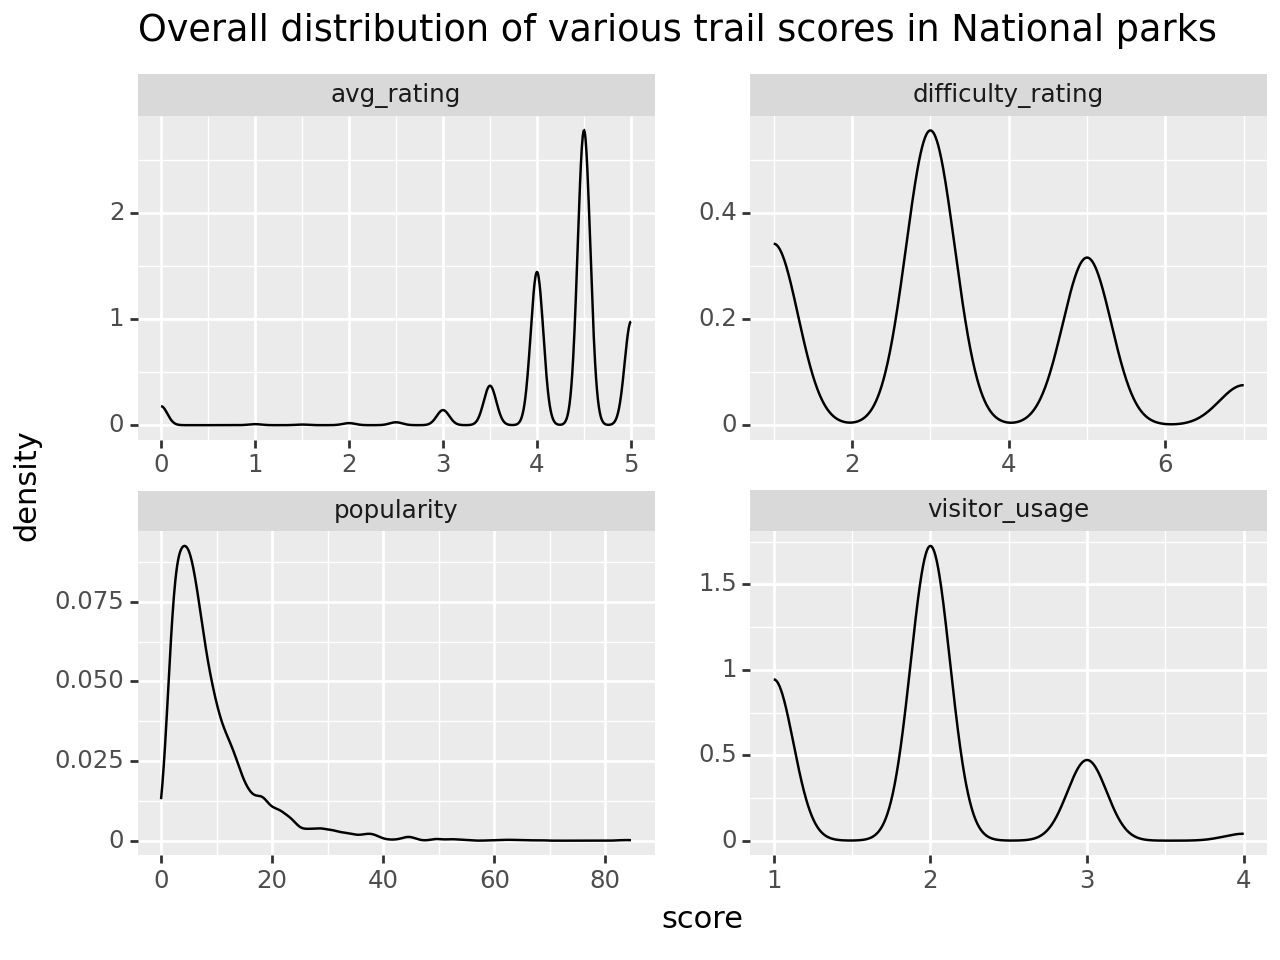

<Figure Size: (640 x 480)>

In [8]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free')
+ ggtitle("Overall distribution of various trail scores in National parks")
)

# Question 1.5

C:\Users\ryanc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
C:\Users\ryanc\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


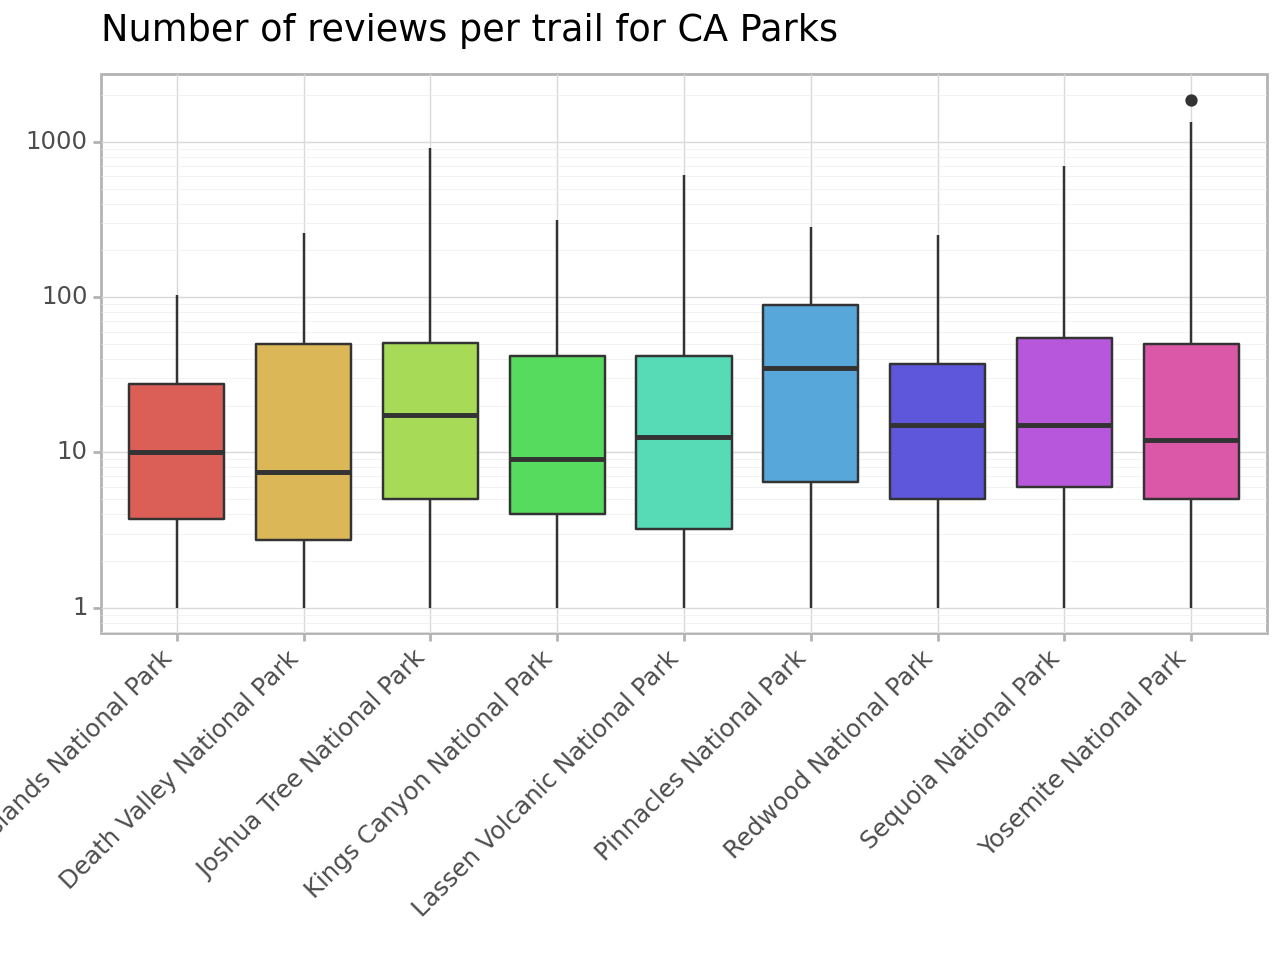

<Figure Size: (640 x 480)>

In [9]:
from plotnine import *

(ggplot(ca_parks, aes(x="area_name", y="num_reviews", fill = "area_name"))
+ geom_boxplot() 
+ scale_fill_discrete(guide=False)
+ scale_y_log10()
+ labs(
  x="",
  y="",
  title="Number of reviews per trail for CA Parks"
)
+ theme_light()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)


# Question 2.1

In [10]:
# Correct state_name and country_name in for Hawaii for consistency,
midterm['state_name'] = midterm['state_name'].replace('Maui', 'Hawaii')
midterm['country_name'] = midterm['country_name'].replace('Hawaii', 'United States')


def recommend_trails(midterm, park_name=None, min_elev=None, max_elev=None, min_rating=None, trail_type=None):
    
    filtered = midterm
    
    # Filter by park_name if provided
    if park_name is not None:
        filtered = filtered[filtered['area_name'] == park_name]
    # Min elevation gain
    if min_elev is not None:
        filtered = filtered[filtered['elevation_gain'] >= min_elev]
    # Max elevation gain
    if max_elev is not None:
        filtered = filtered[filtered['elevation_gain'] <= max_elev]
    # Min rating
    if min_rating is not None:
        filtered = filtered[filtered['avg_rating'] >= min_rating]
    # Trail type
    if trail_type is not None:
        filtered = filtered[filtered['route_type'] == trail_type]
    
    return filtered

In [11]:
recommend_trails(midterm, "Haleakala National Park", min_elev = 1000, min_rating = 4)

trail_id                                  name                area_name  \
3308  10008302  Silversword Loop Via Halemau'u Trail  Haleakala National Park   
3309  10236001                   Keonehe'ehe'e Trail  Haleakala National Park   
3311  10014989                           Kaupo Trail  Haleakala National Park   

     city_name state_name   country_name  \
3308      Kula     Hawaii  United States   
3309      Kula     Hawaii  United States   
3311      Kula     Hawaii  United States   

                                             _geoloc  popularity     length  \
3308            {'lat': 20.75275, 'lng': -156.22884}      9.3861  20116.750   
3309  {'lat': 20.714480000000002, 'lng': -156.25072}      9.1555  28324.384   
3311              {'lat': 20.64981, 'lng': -156.137}      8.3240  19312.080   

      elevation_gain  difficulty_rating    route_type  visitor_usage  \
3308       1105.8144                  5          loop            2.0   
3309       1171.9560                  5  out and back            2.0   
3311       1670.9136                  5  out and back            1.0   

      avg_rating  num_reviews                              features  \
3308         4.5           43  ['dogs-no', 'views', 'wild-flowers']   
3309         5.0           22      ['dogs-no', 'views', 'wildlife']   
3311         4.0            8      ['dogs-no', 'views', 'wildlife']   

                                 activities units  
3308  ['birding', 'hiking', 'nature-trips']     m  
3309   ['backpacking', 'camping', 'hiking']     m  
3311                             ['hiking']     m

# Question 2.2

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_temps(month=None):
    # Base URL and month-to-URL mapping
    base_url = "https://www.extremeweatherwatch.com/"
    month_url_map = {
        "January": "/us-state-averages/month-january",
        "February": "/us-state-averages/month-february",
        "March": "/us-state-averages/month-march",
        "April": "/us-state-averages/month-april",
        "May": "/us-state-averages/month-may",
        "June": "/us-state-averages/month-june",
        "July": "/us-state-averages/month-july",
        "August": "/us-state-averages/month-august",
        "September": "/us-state-averages/month-september",
        "October": "/us-state-averages/month-october",
        "November": "/us-state-averages/month-november",
        "December": "/us-state-averages/month-december"
    }

    # Adjust URL based on the selected month
    if month and month.title() in month_url_map:
        my_url = base_url + month_url_map[month.title()]
    else:
        my_url = base_url + "/us-state-averages"

    # Rest of your scraping logic
    response = requests.get(my_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find table
    table = soup.find('table')

    # Get headers
    headers = [header.text for header in table.find_all('th')]

    if month:
        high_column = month.title() + " High"
        low_column = month.title() + " Low"
        headers = ['State', high_column, low_column]

    # Get row data
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]:
        cells = row.find_all('td')
        state = cells[0].text
        high_temp = float(cells[1].text)
        low_temp = float(cells[2].text)
        row_data = [state, high_temp, low_temp]
        data.append(row_data)

    temp = pd.DataFrame(data, columns=headers)
    
    temp['State'] = temp['State'].str.replace(r'\s*\[\d+\]', '', regex=True)
    return temp


In [13]:
scrape_temps(month = "January")

State  January High  January Low
0          Alabama          56.1         34.5
1           Alaska          10.7         -2.4
2          Arizona          55.7         30.6
3         Arkansas          50.0         30.5
4       California          54.6         35.0
5         Colorado          38.9         13.7
6      Connecticut          36.0         18.5
7         Delaware          43.9         26.5
8          Florida          69.5         47.0
9          Georgia          57.8         35.6
10          Hawaii          77.0         62.5
11           Idaho          33.2         17.1
12        Illinois          34.7         18.6
13         Indiana          35.6         19.8
14            Iowa          28.1         10.9
15          Kansas          42.6         19.5
16        Kentucky          43.5         25.4
17       Louisiana          60.0         39.8
18           Maine          24.7          5.7
19        Maryland          42.5         25.3
20   Massachusetts          34.8         17.1
21        Michigan          27.6         12.8
22       Minnesota          19.2          0.9
23     Mississippi          56.0         35.2
24        Missouri          40.2         21.5
25         Montana          30.7         11.4
26        Nebraska          36.3         13.9
27          Nevada          43.5         22.1
28   New Hampshire          28.7          9.5
29      New Jersey          40.3         23.2
30      New Mexico          49.7         21.7
31        New York          30.2         12.9
32  North Carolina          51.3         30.3
33    North Dakota          19.9          1.0
34            Ohio          35.9         20.3
35        Oklahoma          50.0         26.6
36          Oregon          41.0         26.1
37    Pennsylvania          34.7         18.5
38    Rhode Island          37.5         20.7
39  South Carolina          56.4         34.3
40    South Dakota          28.6          8.2
41       Tennessee          47.4         28.4
42           Texas          59.5         34.8
43            Utah          38.2         17.8
44         Vermont          26.8          7.9
45        Virginia          45.6         26.1
46      Washington          37.4         26.3
47   West Virginia          40.3         22.5
48       Wisconsin          23.8          6.7
49         Wyoming          32.4         11.1

# Question 2.3

### Part a

In [14]:
new_rec = recommend_trails(midterm, min_elev=1000, max_elev=3000, min_rating=4.5, trail_type='loop')

num_rows = new_rec.shape[0]

print(f'The number of trails that satisfy the conditions is: {num_rows}')


The number of trails that satisfy the conditions is: 121


In [15]:
unique_states = new_rec['state_name'].unique()

print('Unique values in the state_name column:')
print(unique_states)

Unique values in the state_name column:
['Arizona' 'California' 'Colorado' 'Maine' 'Montana' 'Nevada'
 'North Carolina' 'Oregon' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Washington' 'Wyoming' 'Hawaii']


### Part b

In [16]:
def scrape_temps(states, months):
    base_url = "https://www.extremeweatherwatch.com/"
    month_url_map = {
        "January": "/us-state-averages/month-january",
        "February": "/us-state-averages/month-february",
        "March": "/us-state-averages/month-march",
        "April": "/us-state-averages/month-april",
        "May": "/us-state-averages/month-may",
        "June": "/us-state-averages/month-june",
        "July": "/us-state-averages/month-july",
        "August": "/us-state-averages/month-august",
        "September": "/us-state-averages/month-september",
        "October": "/us-state-averages/month-october",
        "November": "/us-state-averages/month-november",
        "December": "/us-state-averages/month-december"
    }

    data = []

    for month in months:
        if month.title() in month_url_map:
            my_url = base_url + month_url_map[month.title()]
            response = requests.get(my_url)
            soup = BeautifulSoup(response.text, "html.parser")

            # Find table
            table = soup.find('table')

            # Get row data for specified states
            for row in table.find_all('tr')[1:]:
                cells = row.find_all('td')
                state = cells[0].text.strip()
                if state in states:
                    high_temp = float(cells[1].text)
                    low_temp = float(cells[2].text)
                    row_data = {'Month': month.title(), 'state_name': state, 'High Temp': high_temp, 'Low Temp': low_temp}
                    data.append(row_data)

    temp_df = pd.DataFrame(data)
    return temp_df

In [17]:
selected_states = ['Arizona', 'California', 'Colorado', 'Maine', 'Montana', 'Nevada',
                   'North Carolina', 'Oregon', 'Tennessee', 'Texas', 'Utah', 'Virginia',
                   'Washington', 'Wyoming', 'Hawaii']

selected_months = ['May', 'June', 'July', 'August']

temperature_data = scrape_temps(selected_states, selected_months)
print(temperature_data)

     Month      state_name  High Temp  Low Temp
0      May         Arizona       82.6      50.8
1      May      California       75.6      49.0
2      May        Colorado       67.1      38.9
3      May           Maine       63.2      39.8
4      May         Montana       63.1      37.8
5      May          Nevada       70.4      42.1
6      May  North Carolina       78.3      55.4
7      May          Oregon       64.3      39.5
8      May       Tennessee       78.1      55.3
9      May           Texas       85.7      61.4
10     May            Utah       69.6      42.1
11     May        Virginia       75.4      52.2
12     May      Washington       64.2      41.5
13     May         Wyoming       62.0      36.0
14    June         Arizona       93.0      59.9
15    June      California       84.5      55.5
16    June        Colorado       78.3      47.6
17    June           Maine       72.1      49.5
18    June         Montana       71.7      45.8
19    June          Nevada       81.3   

### Part c

In [18]:
# Merged dataset
merged_data = pd.merge(new_rec, temperature_data, on='state_name', how='left')

# Drop nan value rows
merged_data = merged_data.dropna(subset=['High Temp', 'Low Temp'])

# Filter out unwanted columns
selected_columns = ['name', 'High Temp', 'Low Temp', 'Month', 'elevation_gain', 'area_name', 'state_name']
merged_data = merged_data[selected_columns]

merged_data

name  High Temp  Low Temp  \
0                               Grandview Trail Loop       82.6      50.8   
1                               Grandview Trail Loop       93.0      59.9   
2                               Grandview Trail Loop       95.2      66.8   
3                               Grandview Trail Loop       93.2      65.8   
4      Thunder Creek to Deer Creek and Thunder Falls       82.6      50.8   
..                                               ...        ...       ...   
475                         Sepulcher Mountain Trail       80.3      49.0   
476  Heart Lake and the Two Ocean Plateau Loop Trail       62.0      36.0   
477  Heart Lake and the Two Ocean Plateau Loop Trail       73.2      44.1   
478  Heart Lake and the Two Ocean Plateau Loop Trail       82.1      50.9   
479  Heart Lake and the Two Ocean Plateau Loop Trail       80.3      49.0   

      Month  elevation_gain                   area_name state_name  
0       May       1188.7200  Grand Canyon National Park    Arizona  
1      June       1188.7200  Grand Canyon National Park    Arizona  
2      July       1188.7200  Grand Canyon National Park    Arizona  
3    August       1188.7200  Grand Canyon National Park    Arizona  
4       May       2213.7624  Grand Canyon National Park    Arizona  
..      ...             ...                         ...        ...  
475  August       1071.9816   Yellowstone National Park    Wyoming  
476     May       1700.7840   Yellowstone National Park    Wyoming  
477    June       1700.7840   Yellowstone National Park    Wyoming  
478    July       1700.7840   Yellowstone National Park    Wyoming  
479  August       1700.7840   Yellowstone National Park    Wyoming  

[480 rows x 7 columns]

In [21]:
import pandas as pd

# Assuming merged_data is your DataFrame
pivoted_data = merged_data.pivot_table(index=['name', 'area_name', 'state_name', 'elevation_gain'],
                                       columns='Month',
                                       values=['High Temp', 'Low Temp'],
                                       aggfunc='first')

# Resetting the index to make the columns regular
pivoted_data = pivoted_data.reset_index()

# Flatten the MultiIndex column names
pivoted_data.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in pivoted_data.columns]

pivoted_data.head()


name  \
0          Angels Landing, West Rim, Telephone Loop    
1  Anthony Creek Trail, Russell Field Trail, Appa...   
2  Appalachian Trail, Rocky Top, Eagle Creek and ...   
3  Appalachian Trail: Charlie's Bunion and Kephar...   
4          Austin Mountain and Furnace Mountain Loop   

                             area_name      state_name  elevation_gain  \
0                   Zion National Park            Utah       1139.9520   
1  Great Smoky Mountains National Park       Tennessee       1108.8624   
2  Great Smoky Mountains National Park  North Carolina       2147.9256   
3  Great Smoky Mountains National Park  North Carolina       1386.8400   
4             Shenandoah National Park        Virginia       1164.9456   

   High Temp_August  High Temp_July  High Temp_June  High Temp_May  \
0              85.6            88.2            81.1           69.6   
1              87.4            87.9            85.0           78.1   
2              86.3            88.1            84.9           78.3   
3              86.3            88.1            84.9           78.3   
4              84.6            86.3            82.6           75.4   

   Low Temp_August  Low Temp_July  Low Temp_June  Low Temp_May  
0             56.6           58.4           50.8          42.1  
1             65.5           67.1           63.3          55.3  
2             66.6           67.8           63.8          55.4  
3             66.6           67.8           63.8          55.4  
4             63.8           65.2           60.8          52.2

### Part d

In [22]:
pivoted_data['elevation_gain'] = pivoted_data['elevation_gain'] * 3.28084
pivoted_data['elevation_adjustment'] = pivoted_data['elevation_gain'] / 1000 * 5.4

pivoted_data['MayHigh'] = pivoted_data['High Temp_May'] - pivoted_data['elevation_adjustment']
pivoted_data['MayLow'] = pivoted_data['Low Temp_May'] - pivoted_data['elevation_adjustment']
pivoted_data['JuneHigh'] = pivoted_data['High Temp_June'] - pivoted_data['elevation_adjustment']
pivoted_data['JuneLow'] = pivoted_data['Low Temp_June'] - pivoted_data['elevation_adjustment']
pivoted_data['JulyHigh'] = pivoted_data['High Temp_July'] - pivoted_data['elevation_adjustment']
pivoted_data['JulyLow'] = pivoted_data['Low Temp_July'] - pivoted_data['elevation_adjustment']
pivoted_data['AugustHigh'] = pivoted_data['High Temp_August'] - pivoted_data['elevation_adjustment']
pivoted_data['AugustLow'] = pivoted_data['Low Temp_August'] - pivoted_data['elevation_adjustment']

pivoted_data.head()

name  \
0          Angels Landing, West Rim, Telephone Loop    
1  Anthony Creek Trail, Russell Field Trail, Appa...   
2  Appalachian Trail, Rocky Top, Eagle Creek and ...   
3  Appalachian Trail: Charlie's Bunion and Kephar...   
4          Austin Mountain and Furnace Mountain Loop   

                             area_name      state_name  elevation_gain  \
0                   Zion National Park            Utah     3740.000120   
1  Great Smoky Mountains National Park       Tennessee     3638.000116   
2  Great Smoky Mountains National Park  North Carolina     7047.000226   
3  Great Smoky Mountains National Park  North Carolina     4550.000146   
4             Shenandoah National Park        Virginia     3822.000122   

   High Temp_August  High Temp_July  High Temp_June  High Temp_May  \
0              85.6            88.2            81.1           69.6   
1              87.4            87.9            85.0           78.1   
2              86.3            88.1            84.9           78.3   
3              86.3            88.1            84.9           78.3   
4              84.6            86.3            82.6           75.4   

   Low Temp_August  Low Temp_July  ...  Low Temp_May  elevation_adjustment  \
0             56.6           58.4  ...          42.1             20.196001   
1             65.5           67.1  ...          55.3             19.645201   
2             66.6           67.8  ...          55.4             38.053801   
3             66.6           67.8  ...          55.4             24.570001   
4             63.8           65.2  ...          52.2             20.638801   

     MayHigh     MayLow   JuneHigh    JuneLow   JulyHigh    JulyLow  \
0  49.403999  21.903999  60.903999  30.603999  68.003999  38.203999   
1  58.454799  35.654799  65.354799  43.654799  68.254799  47.454799   
2  40.246199  17.346199  46.846199  25.746199  50.046199  29.746199   
3  53.729999  30.829999  60.329999  39.229999  63.529999  43.229999   
4  54.761199  31.561199  61.961199  40.161199  65.661199  44.561199   

   AugustHigh  AugustLow  
0   65.403999  36.403999  
1   67.754799  45.854799  
2   48.246199  28.546199  
3   61.729999  42.029999  
4   63.961199  43.161199  

[5 rows x 21 columns]